# Import Required Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [32]:
pd.set_option("display.max_columns",None)

In [33]:
df = pd.read_csv('Datasets/RFM data.csv')

# EDA

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df.shape

(392735, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [35]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,392735.000000,392735,392735,392735.000000,392735,392735.000000,392735.000000,392735,392735.000000
unique,NaN,3629,3837,NaN,16859,NaN,NaN,37,NaN
top,NaN,85123A,white hanging heart t-light holder,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,NaN,2010,2003,NaN,540,NaN,NaN,351196,NaN
mean,560624.318859,NaN,NaN,10.242645,NaN,2.787111,15300.835136,NaN,18.246537
std,13113.076784,NaN,NaN,16.172009,NaN,2.704759,1709.095993,NaN,32.558080
min,536365.000000,NaN,NaN,1.000000,NaN,0.120000,12347.000000,NaN,0.120000
25%,549233.000000,NaN,NaN,2.000000,NaN,1.250000,13975.000000,NaN,4.680000
50%,561894.000000,NaN,NaN,5.000000,NaN,1.950000,15159.000000,NaN,11.700000
75%,572103.000000,NaN,NaN,12.000000,NaN,3.750000,16800.000000,NaN,19.500000


In [36]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [37]:
df.duplicated().sum()

5182

In [38]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [39]:
df.shape

(387553, 9)

In [40]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387553 entries, 0 to 387552
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387553 non-null  int64  
 1   StockCode    387553 non-null  object 
 2   Description  387553 non-null  object 
 3   Quantity     387553 non-null  int64  
 4   InvoiceDate  387553 non-null  object 
 5   UnitPrice    387553 non-null  float64
 6   CustomerID   387553 non-null  float64
 7   Country      387553 non-null  object 
 8   TotalPrice   387553 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 26.6+ MB


###  Min ans Max Invoice date

In [42]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

('2010-12-01 08:26:00', '2011-12-09 12:50:00')

In [29]:
df[df.Quantity==147]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
27190,540262,47591D,pink fairy cake childrens apron,147,2011-01-06 10:01:00,1.65,14045,United Kingdom,242.55


In [30]:
147*1.65

242.54999999999998

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [44]:
df['CustomerID']= df['CustomerID'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387553 entries, 0 to 387552
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387553 non-null  int64         
 1   StockCode    387553 non-null  object        
 2   Description  387553 non-null  object        
 3   Quantity     387553 non-null  int64         
 4   InvoiceDate  387553 non-null  datetime64[ns]
 5   UnitPrice    387553 non-null  float64       
 6   CustomerID   387553 non-null  int32         
 7   Country      387553 non-null  object        
 8   TotalPrice   387553 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 25.1+ MB


In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Recency of each customer

In [47]:
df_recency= df.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns= ['Customer ID','Last Purchase Date']
recent_date= df_recency['Last Purchase Date'].max()
df_recency['Recency']= df_recency['Last Purchase Date'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,Customer ID,Last Purchase Date,Recency
0,12347,2011-12-07 15:52:00,1
1,12348,2011-09-25 13:13:00,74
2,12349,2011-11-21 09:51:00,18
3,12350,2011-02-02 16:01:00,309
4,12352,2011-11-03 14:37:00,35


## Frequency of each customer

In [48]:
df_frequency= df.groupby(by='CustomerID',as_index=False)['InvoiceDate'].count()
df_frequency.columns= ['Customer ID','Frequency']
df_frequency.head()

,Customer ID,Frequency
0,12347,181
1,12348,27
2,12349,71
3,12350,16
4,12352,77


## Monetary for each customer

In [49]:
monetary_df=df.groupby(by='CustomerID',as_index=False)['TotalPrice'].sum()
monetary_df.columns= ['Customer ID','Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12347,4060.40
1,12348,1437.24
2,12349,1417.60
3,12350,294.40
4,12352,1385.74


## RFM Dataframe for each customer

In [50]:
rf_df=df_recency.merge(df_frequency,on='Customer ID')
rfm_df = rf_df.merge(monetary_df, on='Customer ID').drop(columns='Last Purchase Date')
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12347,1,181,4060.40
1,12348,74,27,1437.24
2,12349,18,71,1417.60
3,12350,309,16,294.40
4,12352,35,77,1385.74


## Calculate R, F, and M ranks

In [52]:
# Calculate R, F, and M ranks
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=True)        # Lower recency is better
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=False)      # Higher frequency is better
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=False)       # Higher monetary value is better

In [53]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12347,1,181,4060.40,134.5,506.5,317.0
1,12348,74,27,1437.24,2664.0,2696.0,1161.0
2,12349,18,71,1417.60,1143.5,1443.0,1185.0
3,12350,309,16,294.40,4072.5,3293.5,3218.0
4,12352,35,77,1385.74,1805.0,1365.5,1210.0


## Apply scaling to the R, F, and M ranks to scale in range of 1 to 5 using min-max scalar

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale values between 1 and 5
scaler = MinMaxScaler(feature_range=(1, 5))

In [55]:
# Apply scaling to the R, F, and M ranks
rfm_df['R_score_scaled'] = scaler.fit_transform(rfm_df[['R_rank']])
rfm_df['F_score_scaled'] = scaler.fit_transform(rfm_df[['F_rank']])
rfm_df['M_score_scaled'] = scaler.fit_transform(rfm_df[['M_rank']])

In [56]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_score_scaled,F_score_scaled,M_score_scaled
0,12347,1,181,4060.40,134.5,506.5,317.0,1.083314,1.474036,1.294159
1,12348,74,27,1437.24,2664.0,2696.0,1161.0,3.464580,3.527254,2.079823
2,12349,18,71,1417.60,1143.5,1443.0,1185.0,2.033184,2.352245,2.102164
3,12350,309,16,294.40,4072.5,3293.5,3218.0,4.790539,4.087563,3.994647
4,12352,35,77,1385.74,1805.0,1365.5,1210.0,2.655919,2.279569,2.125436


In [57]:
rfm_df['R_score_scaled']= np.round(rfm_df['R_score_scaled'],2)
rfm_df['F_score_scaled']=np.round(rfm_df['F_score_scaled'],2)
rfm_df['M_score_scaled']=np.round(rfm_df['M_score_scaled'],2)

In [58]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_score_scaled,F_score_scaled,M_score_scaled
0,12347,1,181,4060.40,134.5,506.5,317.0,1.08,1.47,1.29
1,12348,74,27,1437.24,2664.0,2696.0,1161.0,3.46,3.53,2.08
2,12349,18,71,1417.60,1143.5,1443.0,1185.0,2.03,2.35,2.10
3,12350,309,16,294.40,4072.5,3293.5,3218.0,4.79,4.09,3.99
4,12352,35,77,1385.74,1805.0,1365.5,1210.0,2.66,2.28,2.13


## Calculate the RFM Score for each customer

In [59]:
# Calculate the final RFM Score
rfm_df['RFM_Score'] = rfm_df['R_score_scaled'] + rfm_df['F_score_scaled'] + rfm_df['M_score_scaled']

In [60]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_score_scaled,F_score_scaled,M_score_scaled,RFM_Score
0,12347,1,181,4060.40,134.5,506.5,317.0,1.08,1.47,1.29,3.84
1,12348,74,27,1437.24,2664.0,2696.0,1161.0,3.46,3.53,2.08,9.07
2,12349,18,71,1417.60,1143.5,1443.0,1185.0,2.03,2.35,2.10,6.48
3,12350,309,16,294.40,4072.5,3293.5,3218.0,4.79,4.09,3.99,12.87
4,12352,35,77,1385.74,1805.0,1365.5,1210.0,2.66,2.28,2.13,7.07


- higher RFM scores indicate more valuable customers

## segment customers based on RFM score ranges

In [61]:
# Define function to segment customers based on RFM score ranges
def assign_segment(row):
    R, F, M = row['R_score_scaled'], row['F_score_scaled'], row['M_score_scaled']
    
    # Define conditions based on the given RFM ranges
    if R >= 4 and F >= 4 and M >= 4:
        return 'Champions'
    elif R >= 3 and F >= 3 and M >= 3:
        return 'Loyal customers'
    elif R >= 4 and F >= 2 and M >= 2:
        return 'Potential loyalist'
    elif R >= 4 and F <= 2 and M <= 2:
        return 'Recent customers'
    elif R >= 4 and F <= 2 and M <= 2:
        return 'Promising'
    elif R >= 3 and F >= 3 and M >= 3:
        return 'Needs attention'
    elif R <= 2 and F <= 2 and M <= 2:
        return 'Hibernating'
    elif R >= 2 and F <= 3 and M <= 3:
        return 'At risk'
    elif R <= 3 and F >= 4 and M >= 4:
        return "Can't lose them"
    elif R <= 2 and F <= 2 and M <= 2:
        return 'About to sleep'
    else:
        return 'Other'

In [62]:
# Apply function to create a new 'Segment' column
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

In [63]:
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_score_scaled,F_score_scaled,M_score_scaled,RFM_Score,Segment
0,12347,1,181,4060.40,134.5,506.5,317.0,1.08,1.47,1.29,3.84,Hibernating
1,12348,74,27,1437.24,2664.0,2696.0,1161.0,3.46,3.53,2.08,9.07,Other
2,12349,18,71,1417.60,1143.5,1443.0,1185.0,2.03,2.35,2.10,6.48,At risk
3,12350,309,16,294.40,4072.5,3293.5,3218.0,4.79,4.09,3.99,12.87,Loyal customers
4,12352,35,77,1385.74,1805.0,1365.5,1210.0,2.66,2.28,2.13,7.07,At risk


In [64]:
rfm_df['Segment'].value_counts()

Segment
Other                 1222
At risk                925
Loyal customers        882
Hibernating            453
Champions              385
Potential loyalist     214
Can't lose them        194
Recent customers        23
Name: count, dtype: int64

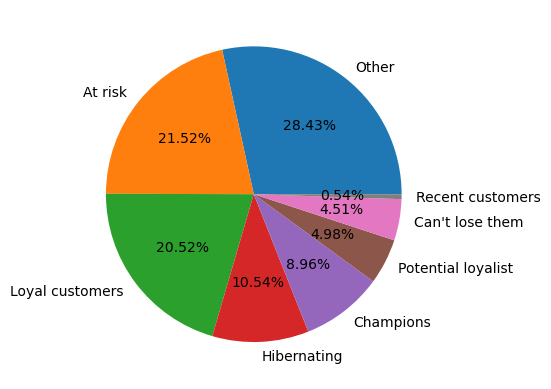

In [66]:
rfm_df['Segment'].value_counts().plot(kind='pie',autopct='%1.2f%%');
plt.ylabel(" ");

## Strategies and insights
- the customers who are at risk with low RFM score must be retained by giving some discount and other offers and card or membership
- the recent customers must be contacted and recommened for new product launches or products matching their interest and given offers to keep visiting the store
- loyal customers are having high RFM score so ideal customers for the store
- customers can be reached rewards, marketting, personalized recommendations of products, surveys, feedbacks, regular engagement etc
- the risk customers can be retained through data driven decisions